In [230]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import re
# from unidecode import unidecode
# import cartopy
# from cartopy.crs import PlateCarree
from math import cos, sin, asin
from math import pi
# from geonamescache import GeonamesCache
# from cartopy.crs import LambertConformal
from collections import Counter
from scipy.spatial.distance import euclidean
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MiniBatchKMeans
from IPython.display import display, HTML

In [1]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."' 
text3 = 'She sells 3 seashells to John, who lives by the lake.'


In [2]:
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists
for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")


Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [3]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
    return text.lower()
for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



In [4]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")


Unique Words in text 1
{'she', 'sells', 'seashells', 'by', 'seashore', 'the'}

Unique Words in text 2
{'on', 'sale', 'seashells', 'are', 'by', 'seashore', 'the'}

Unique Words in text 3
{'lake', 'by', 'she', 'sells', '3', 'lives', 'seashells', 'john', 'who', 'to', 'the'}



In [5]:
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:") 
    print(f"{shared_words}\n")


Texts 1 and 2 share these 4 words:
{'seashells', 'seashore', 'by', 'the'}

Texts 1 and 3 share these 5 words:
{'she', 'sells', 'seashells', 'by', 'the'}



In [6]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:") 
    print(f"{diverging_words}\n")


Texts 1 and 2 don't share these 5 words:
{'sale', 'on', 'she', 'sells', 'are'}

Texts 1 and 3 don't share these 7 words:
{'lake', '3', 'lives', 'seashore', 'john', 'who', 'to'}



In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. These words are:\n {total_words}\n")


Together, texts 1 and 2 contain 9 unique words. These words are:
 {'on', 'sale', 'she', 'sells', 'seashells', 'are', 'by', 'seashore', 'the'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'lake', 'seashells', 'by', 'to', 'she', 'sells', '3', 'lives', 'john', 'who', 'seashore', 'the'}



In [9]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words) 
    percent_shared = 100 * len(shared_words) / len(total_words) 
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    print(f"Together, texts 1 and {i} contain {len(total_words)} " f"unique words. \n{percent_shared:.2f}% of these words are " f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")


Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



In [10]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
                 f"equals {similarity:.4f}." "\n")


The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [11]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

In [12]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)} 
value_to_word = {value: word for word, value in vocabulary.items()} 
print(f"Our vocabulary contains {len(vocabulary)} words. "
              f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'lake': 0, 'sale': 1, 'seashells': 2, 'by': 3, 'to': 4, 'on': 5, 'she': 6, 'sells': 7, '3': 8, 'lives': 9, 'are': 10, 'john': 11, 'who': 12, 'seashore': 13, 'the': 14}


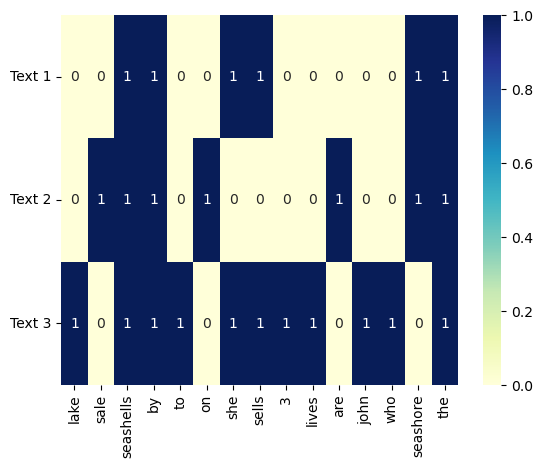

In [14]:
vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [15]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")


'seashells' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2
'the' is present in both texts 1 and 2


In [16]:
shared_word_count = sum(vector1[i] * vector2[i]
                        for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

In [17]:
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

In [18]:
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

In [19]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total
for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i]) 
    assert similarity == jaccard_similarity(text1, text)

In [20]:
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2) 
print(f"The similarity of 2 non-binary vectors is {similarity}")


The similarity of 2 non-binary vectors is 0.96875


In [21]:
similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71])) 
print(f"The similarity between texts is approximately {similarity:.3f}")


The similarity between texts is approximately 0.024


In [22]:
assert tanimoto_similarity(np.array([1, 1]), np.array([1, 1])) == 1

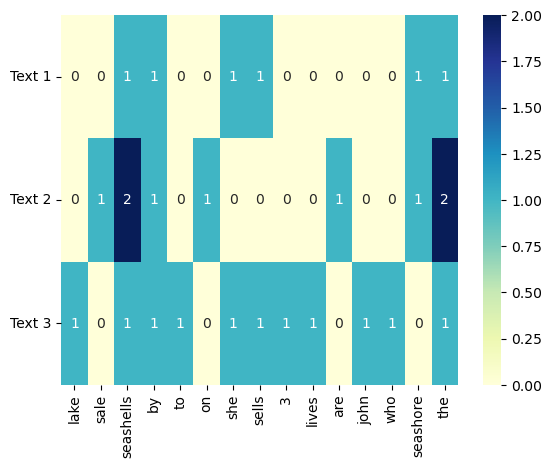

In [23]:
tf_vectors = []
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0] * len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        tf_vector[word_index] += 1
    tf_vectors.append(tf_vector)
sns.heatmap(tf_vectors,  cmap='YlGnBu', annot=True, xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [24]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]
for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1]) 
    print(f"The recomputed Tanimoto similarity between texts 1 and {i} is" f" {similarity:.4f}.")
    print(f"Previously, that similarity equaled {old_similarity:.4f} " "\n")

The recomputed Tanimoto similarity between texts 1 and 2 is 0.4615.
Previously, that similarity equaled 0.4444 

The recomputed Tanimoto similarity between texts 1 and 3 is 0.4167.
Previously, that similarity equaled 0.4167 



In [25]:
query_vector = np.array([1, 1])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

In [26]:
titles = ["A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!", "B: Pepperoni"]
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector) for title_vector in title_vectors]
for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a query similarity of {similarity:.4f}")


'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


In [27]:
assert np.array_equal(query_vector, title_a_vector / 3) 
assert tanimoto_similarity(query_vector,
                           title_a_vector / 3) == 1

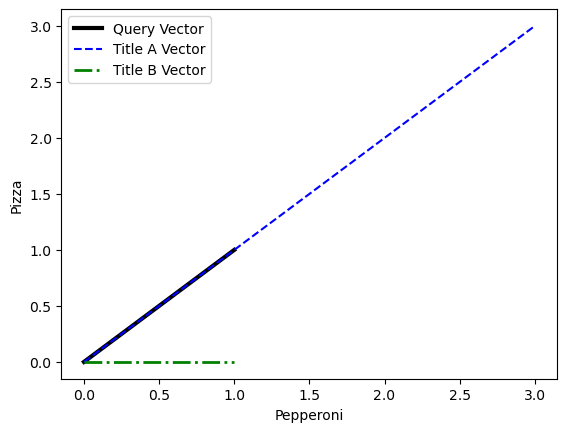

In [29]:
# plotting TF Vector in 2d Space

plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k', linewidth=3, label='Query Vector')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b', linestyle='--', label='Title A Vector')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g', linewidth=2, linestyle='-.', label='Title B Vector')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()


In [31]:
vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector'] 
tf_search_vectors = [query_vector, title_a_vector, title_b_vector] 
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** 0.5 
    print(f"{name}'s magnitude is approximately {magnitude:.4f}")
magnitude_ratio = norm(title_a_vector) / norm(query_vector) 
print(f"\nVector A is {magnitude_ratio:.0f}x as long as Query Vector")

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


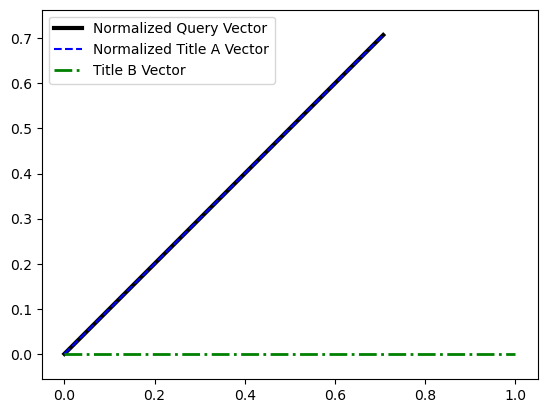

In [33]:
unit_query_vector = query_vector / norm(query_vector) 
unit_title_a_vector = title_a_vector / norm(title_a_vector) 
assert np.allclose(unit_query_vector, unit_title_a_vector) 
unit_title_b_vector = title_b_vector
plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k', linewidth=3, label='Normalized Query Vector')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b', linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g', linewidth=2, linestyle='-.', label='Title B Vector')
plt.axis('equal')
plt.legend()
plt.show()

In [34]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector] 
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector)
                for unit_title_vector in unit_title_vectors]
for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a normalized query similarity of {similarity:.4f}")


'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


In [35]:
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)
for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector) 
    assert similarity == tanimoto_similarity(unit_query_vector,
                                             unit_title_vector)

In [38]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vector'] 
u1 = unit_query_vector
for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors): 
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10) 
    measurements = {'Tanimoto similarity': similarity, 'cosine similarity': cosine_similarity, 'Euclidean distance': euclidean_distance, 'angle': np.degrees(angle)}
    print("We are comparing Normalized Query Vector and " f"{unit_vector_name}")
    for measurement_type, value in measurements.items():
        output = f"The {measurement_type} between vectors is {value:.4f}" 
        if measurement_type == 'angle':
            output += ' degrees\n'
    print(output)

We are comparing Normalized Query Vector and Normalized Title A vector
The angle between vectors is 0.0000 degrees

We are comparing Normalized Query Vector and Title B Vector
The angle between vectors is 45.0000 degrees



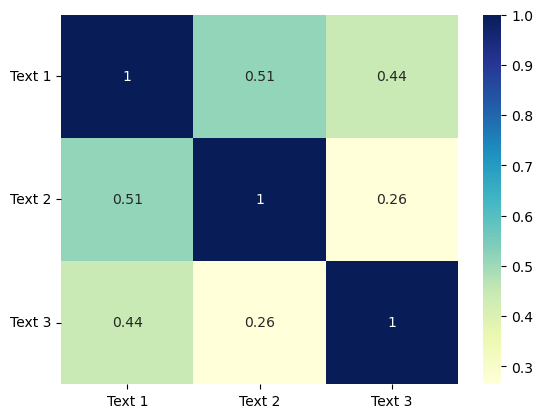

In [40]:
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)]) 
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors]) 
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i][j] = normalized_tanimoto(vector_a, vector_b)
labels = ['Text 1', 'Text 2', 'Text 3'] 
sns.heatmap(similarities, cmap='YlGnBu', annot=True, xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

In [41]:
import pandas as pd
matrices = [unit_vectors, pd.DataFrame(unit_vectors)] 
matrix_types = ['2D NumPy array', 'Pandas DataFrame']
for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"Our {matrix_type} contains " f"{row_count} rows and {column_count} columns") 
    assert (column_count, row_count) == matrix.T.shape


Our 2D NumPy array contains 3 rows and 15 columns
Our Pandas DataFrame contains 3 rows and 15 columns


In [43]:
double_similarities = 2 * similarities 
np.array_equal(double_similarities, similarities + similarities) 
zero_matrix = similarities - similarities
negative_1_matrix = similarities - similarities - 1
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert double_similarities[i][j] == 2 * similarities[i][j] 
        assert zero_matrix[i][j] == 0
        assert negative_1_matrix[i][j] == -1


In [44]:
squared_similarities = similarities * similarities
assert np.array_equal(squared_similarities, similarities ** 2) 
ones_matrix = similarities / similarities
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert squared_similarities[i][j] == similarities[i][j] ** 2 
        assert ones_matrix[i][j] == 1


In [45]:
cosine_similarities  = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j],
                 15) == round(cosine_sim, 15)

In [46]:
for name, matrix in [('Similarities', similarities),
                     ('Unit Vectors', unit_vectors)]:
    print(f"Accessing rows and columns in the {name} Matrix.")
    row, column = matrix[0], matrix[:,0]
    print(f"Row at index 0 is:\n{row}")
    print(f"\nColumn at index 0 is:\n{column}\n")


Accessing rows and columns in the Similarities Matrix.
Row at index 0 is:
[1.         0.51442439 0.44452044]

Column at index 0 is:
[1.         0.51442439 0.44452044]

Accessing rows and columns in the Unit Vectors Matrix.
Row at index 0 is:
[0.         0.         0.40824829 0.40824829 0.         0.
 0.40824829 0.40824829 0.         0.         0.         0.
 0.         0.40824829 0.40824829]

Column at index 0 is:
[0.         0.         0.30151134]



In [47]:
row = similarities[0]
column = unit_vectors[:,0]
dot_product = row @ column
print(f"The dot product between the row and column is: {dot_product:.4f}")

The dot product between the row and column is: 0.1340


In [48]:
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"The dot product between row {i} column {j} is: "
              f"{dot_product:.4f}")


The dot product between row 0 column 0 is: 0.1340
The dot product between row 0 column 1 is: 0.1427
The dot product between row 0 column 2 is: 0.8276
The dot product between row 0 column 3 is: 0.6850
The dot product between row 0 column 4 is: 0.1340
The dot product between row 0 column 5 is: 0.1427
The dot product between row 0 column 6 is: 0.5423
The dot product between row 0 column 7 is: 0.5423
The dot product between row 0 column 8 is: 0.1340
The dot product between row 0 column 9 is: 0.1340
The dot product between row 0 column 10 is: 0.1427
The dot product between row 0 column 11 is: 0.1340
The dot product between row 0 column 12 is: 0.1340
The dot product between row 0 column 13 is: 0.5509
The dot product between row 0 column 14 is: 0.8276
The dot product between row 1 column 0 is: 0.0797
The dot product between row 1 column 1 is: 0.2774
The dot product between row 1 column 2 is: 0.8444
The dot product between row 1 column 3 is: 0.5671
The dot product between row 1 column 4 is: 0.

In [49]:
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]
print(dot_products)


[[0.13402795 0.14267565 0.82762755 0.6849519  0.13402795 0.14267565
  0.54227624 0.54227624 0.13402795 0.13402795 0.14267565 0.13402795
  0.13402795 0.55092394 0.82762755]
 [0.07969524 0.2773501  0.84440831 0.56705821 0.07969524 0.2773501
  0.28970812 0.28970812 0.07969524 0.07969524 0.2773501  0.07969524
  0.07969524 0.48736297 0.84440831]
 [0.30151134 0.07330896 0.62960397 0.55629501 0.30151134 0.07330896
  0.48298605 0.48298605 0.30151134 0.30151134 0.07330896 0.30151134
  0.30151134 0.25478367 0.62960397]]


In [50]:
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)

In [51]:
try:
    matrix_product = unit_vectors @ similarities
except:
    print("We can't compute the matrix product")

We can't compute the matrix product


In [52]:
matrix_product = np.matmul(similarities, unit_vectors) 
assert np.array_equal(matrix_product,
                      similarities @ unit_vectors)

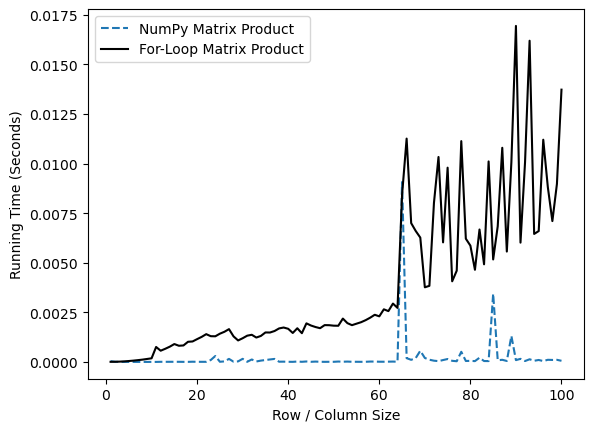

In [53]:
import time
numpy_run_times = []
for_loop_run_times = []
matrix_sizes = range(1, 101)
for size in matrix_sizes:
    matrix = np.ones((size, size))
    start_time = time.time()
    matrix @ matrix
    numpy_run_times.append(time.time() - start_time)
    start_time = time.time()
    for i in range(size):
        for j in range(size):
            matrix[i] @ matrix[:,j]
    for_loop_run_times.append(time.time() - start_time)
plt.plot(matrix_sizes, numpy_run_times,
         label='NumPy Matrix Product', linestyle='--')
plt.plot(matrix_sizes, for_loop_run_times,
         label='For-Loop Matrix Product', color='k')
plt.xlabel('Row / Column Size')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.show()

In [54]:
cosine_matrix = unit_vectors @ unit_vectors.T
assert np.allclose(cosine_matrix, cosine_similarities)

In [55]:
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix)
assert np.allclose(tanimoto_matrix, similarities)

In [56]:
output = normalized_tanimoto(unit_vectors, unit_vectors.T) 
assert np.array_equal(output, tanimoto_matrix)

In [57]:
vocabulary_size = 50000
normalized_vector = [1 / vocabulary_size] * vocabulary_size
book_count = 30
def measure_run_time(book_count):
    book_matrix = np.array([normalized_vector] * book_count)
    start_time = time.time()
    normalized_tanimoto(book_matrix, book_matrix.T)
    return time.time() - start_time
run_time = measure_run_time(book_count)
print(f"It took {run_time:.4f} seconds to compute the similarities across a " f"{book_count}-book by {vocabulary_size}-word matrix")


It took 0.0030 seconds to compute the similarities across a 30-book by 50000-word matrix


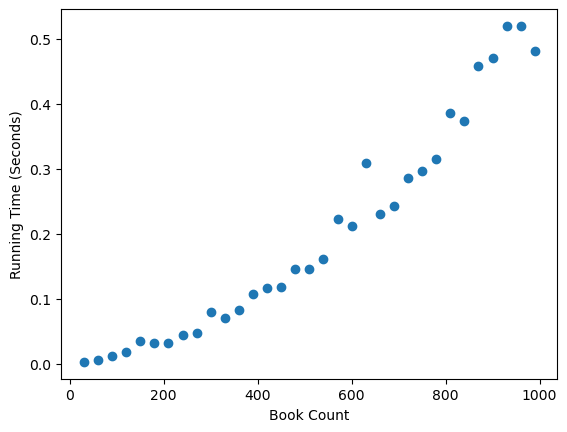

In [58]:

book_counts = range(30, 1000, 30)
run_times = [measure_run_time(book_count)
             for book_count in book_counts]
plt.scatter(book_counts, run_times)
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

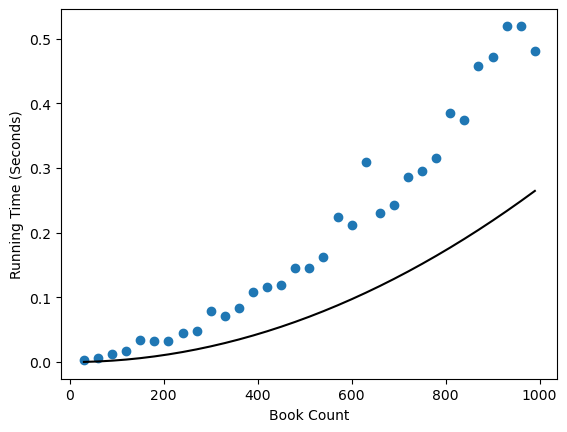

In [60]:
def y(x): return (0.27 / (1000 ** 2)) * (x ** 2) 
plt.scatter(book_counts, run_times) 
plt.plot(book_counts, y(np.array(book_counts)), c='k') 
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

In [62]:
book_count = 300000
run_time = y(book_count) / 3600
print(f"It will take {run_time} hours to compute all-by-all similarities "f"from a {book_count}-book by {vocabulary_size}-word matrix")

It will take 6.75 hours to compute all-by-all similarities from a 300000-book by 50000-word matrix


### Dmiensionality Reduction

In [63]:
heights = np.arange(60, 78, 0.1)

In [64]:
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size) 
weights = 4 * heights - 130 + random_fluctuations


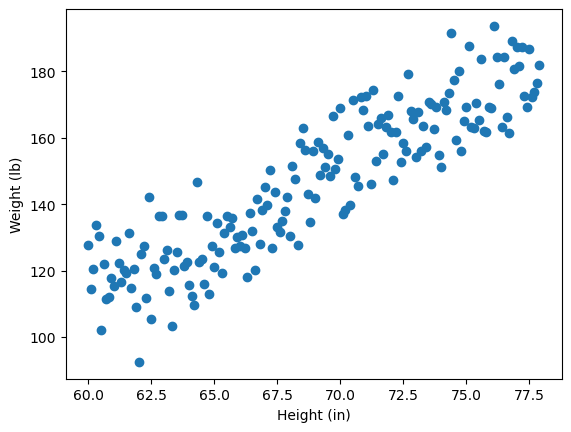

In [65]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.show()

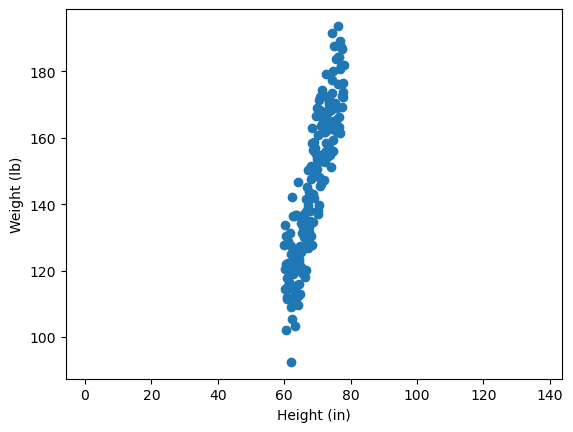

In [66]:
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.axis('equal')
plt.show()


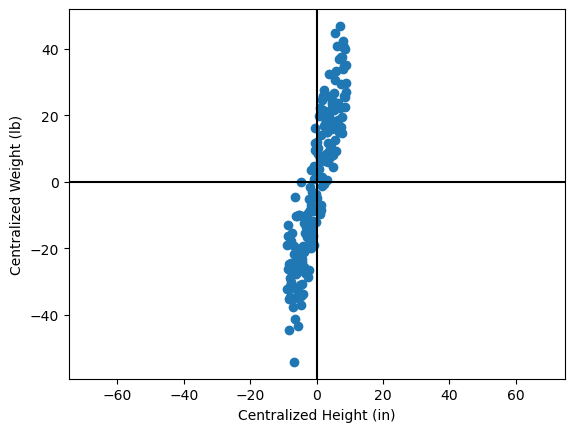

In [67]:
centered_data = np.array([heights - heights.mean(), weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.show()

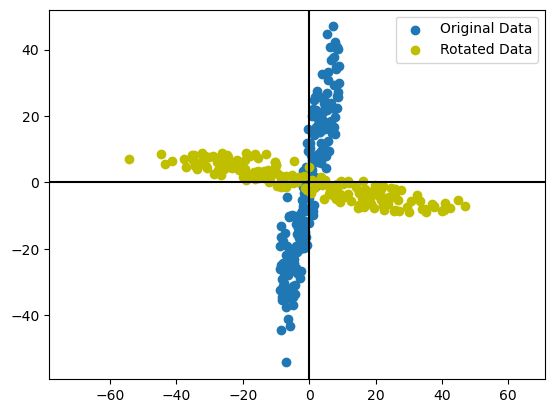

In [70]:
angle = np.radians(-90)
rotation_matrix = np.array([[cos(angle), -sin(angle)],
                            [sin(angle), cos(angle)]])
rotated_data = rotation_matrix @ centered_data
plt.scatter(centered_data[0], centered_data[1], label='Original Data') 
plt.scatter(rotated_data[0], rotated_data[1], c='y', label='Rotated Data') 
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.legend()
plt.axis('equal')
plt.show()

In [71]:
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_values = data[1]
    penalty = y_values @ y_values / y_values.size
    print(f"The penalty score for the {data_label} data is {penalty:.2f}")


The penalty score for the unrotated data is 519.82
The penalty score for the rotated data is 27.00


In [80]:
for data_label, data in zip(data_labels, data_list):
    y_var = data[1].var()
    penalty = data[1] @ data[1] / data[0].size
    round(y_var, 14) == round(penalty, 14)
    print(f"The y-axis variance for the {data_label} data is {y_var:.2f}")

The y-axis variance for the unrotated data is 519.82
The y-axis variance for the rotated data is 27.00


In [81]:
for data_label, data in zip(data_labels, data_list):
    x_var = data[0].var()
    print(f"The x-axis variance for the {data_label} data is {x_var:.2f}")


The x-axis variance for the unrotated data is 27.00
The x-axis variance for the rotated data is 519.82


In [82]:
total_variance = centered_data[0].var() + centered_data[1].var() 
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

In [83]:
for data_label, data in zip(data_labels, data_list):
    percent_x_axis_var = 100 * data[0].var() / total_variance 
    percent_y_axis_var = 100 * data[1].var() / total_variance
    print(f"In the {data_label} data, {percent_x_axis_var:.2f}% of the "
          "total variance is distributed across the x-axis") 
    print(f"The remaining {percent_y_axis_var:.2f}% of the total "
           "variance is distributed across the y-axis\n")


In the unrotated data, 4.94% of the total variance is distributed across the x-axis
The remaining 95.06% of the total variance is distributed across the y-axis

In the rotated data, 95.06% of the total variance is distributed across the x-axis
The remaining 4.94% of the total variance is distributed across the y-axis



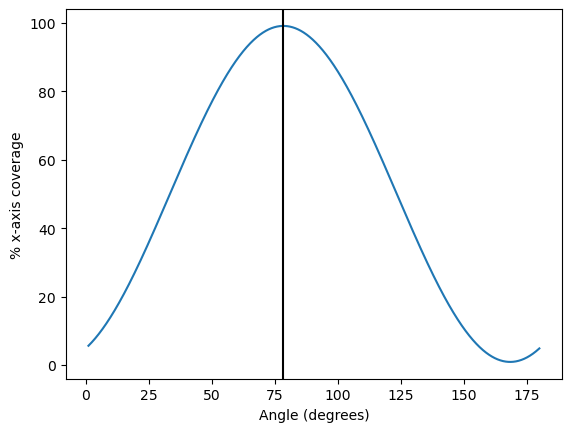

The horizontal variance is maximized to approximately 541 after a 78.3 degree rotation.
That rotation distributes 99.08% of the total variance onto the x-axis.


In [84]:
def rotate(angle, data=centered_data):
    angle = np.radians(-angle)
    rotation_matrix = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    return rotation_matrix @ data

angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]

percent_x_variances = 100 * np.array(x_variances) / total_variance 
optimal_index = np.argmax(percent_x_variances)
optimal_angle = angles[optimal_index]
plt.plot(angles, percent_x_variances)
plt.axvline(optimal_angle, c='k')
plt.xlabel('Angle (degrees)')
plt.ylabel('% x-axis coverage')
plt.show()

max_coverage = percent_x_variances[optimal_index]
max_x_var = x_variances[optimal_index]
print("The horizontal variance is maximized to approximately " f"{int(max_x_var)} after a {optimal_angle:.1f} degree rotation.")
print(f"That rotation distributes {max_coverage:.2f}% of the total " "variance onto the x-axis.")

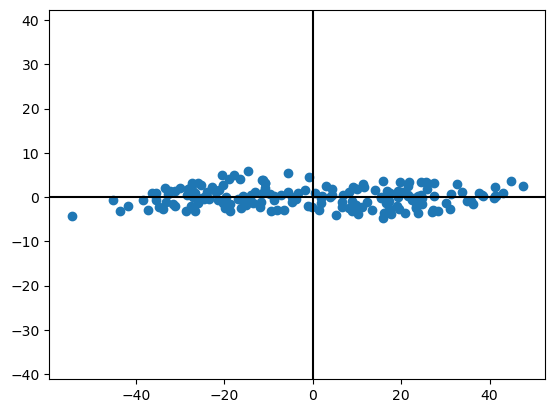

In [85]:
best_rotated_data = rotate(optimal_angle) 
plt.scatter(best_rotated_data[0], best_rotated_data[1]) 
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()


In [86]:
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size / 3)
small_cutoff = max(sorted_x_values[:cluster_size])
large_cutoff = min(sorted_x_values[-cluster_size:])
print(f"A 1D threshold of {small_cutoff:.2f} separates the small-sized "
        "and medium-sized customers.")
print(f"A 1D threshold of {large_cutoff:.2f} separates the medium-sized "
        "and large-sized customers.")

A 1D threshold of -14.61 separates the small-sized and medium-sized customers.
A 1D threshold of 15.80 separates the medium-sized and large-sized customers.


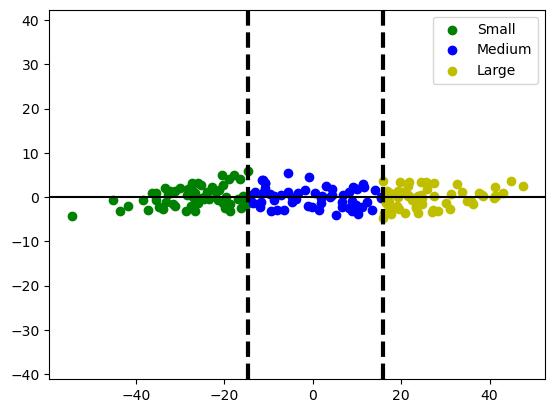

In [87]:
def plot_customer_segments(horizontal_2d_data):
    small, medium, large = [], [], []
    cluster_labels = ['Small', 'Medium', 'Large']
    for x_value, y_value in horizontal_2d_data.T:
        if x_value <= small_cutoff:
            small.append([x_value, y_value])
        elif small_cutoff < x_value < large_cutoff:
            medium.append([x_value, y_value])
        else:
            large.append([x_value, y_value])
            
    for i, cluster in enumerate([small, medium, large]):
        cluster_x_values, cluster_y_values = np.array(cluster).T 
        plt.scatter(cluster_x_values, cluster_y_values,
                color=['g', 'b', 'y'][i],
                label=cluster_labels[i])
    plt.axhline(0, c='black')
    plt.axvline(large_cutoff, c='black', linewidth=3, linestyle='--') 
    plt.axvline(small_cutoff, c='black', linewidth=3, linestyle='--') 
    plt.axis('equal')
    plt.legend()
    plt.show()
plot_customer_segments(best_rotated_data)

In [88]:
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

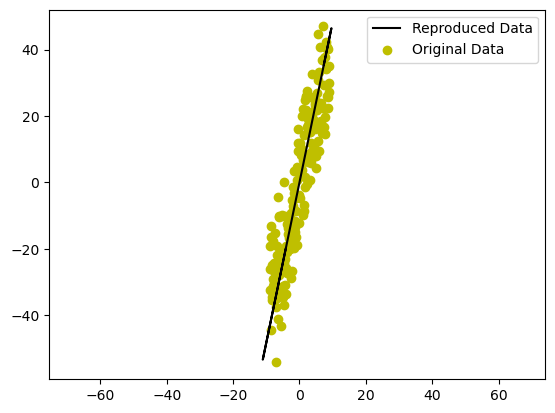

In [89]:
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='Reproduced Data')
plt.scatter(centered_data[0], centered_data[1], c='y', label='Original Data')
plt.axis('equal')
plt.legend()
plt.show()

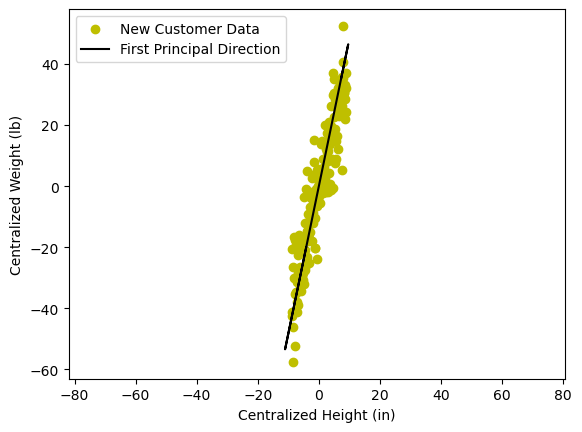

In [90]:
np.random.seed(1)
new_heights = np.arange(60, 78, .11)
random_fluctuations = np.random.normal(scale=10, size=new_heights.size) 
new_weights = 4 * new_heights - 130 + random_fluctuations

new_centered_data = np.array([new_heights - heights.mean(), new_weights - weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y', label='New Customer Data')
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='First Principal Direction')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

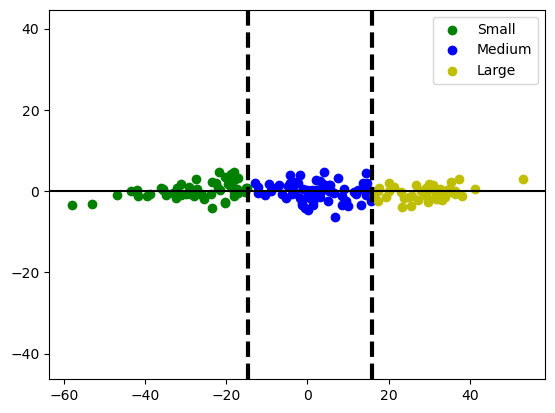

In [91]:
new_horizontal_data = rotate(optimal_angle, data=new_centered_data) 
plot_customer_segments(new_horizontal_data)


In [93]:
pca_object = PCA()

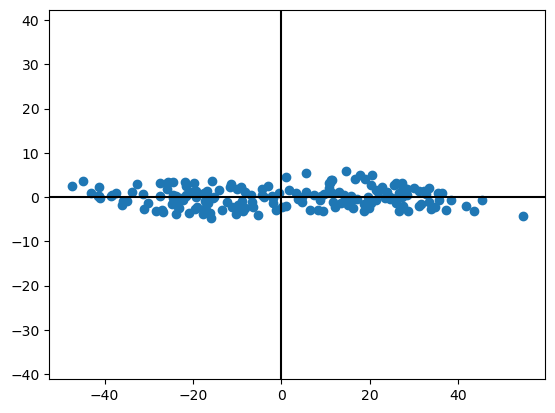

In [94]:
pca_transformed_data = pca_object.fit_transform(measurements.T) 
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1]) 
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()


In [95]:
percent_variance_coverages = 100 * pca_object.explained_variance_ratio_ 
x_axis_coverage, y_axis_coverage = percent_variance_coverages 
print(f"The x-axis of our PCA output covers {x_axis_coverage:.2f}% of "
       "the total variance")

The x-axis of our PCA output covers 99.08% of the total variance


In [96]:
first_pc = pca_object.components_[0]
magnitude = norm(first_pc)
print(f"Vector {first_pc} points in a direction that covers "
      f"{x_axis_coverage:.2f}% of the total variance.")
print(f"The vector has a magnitude of {magnitude}")

Vector [-0.20223994 -0.979336  ] points in a direction that covers 99.08% of the total variance.
The vector has a magnitude of 1.0


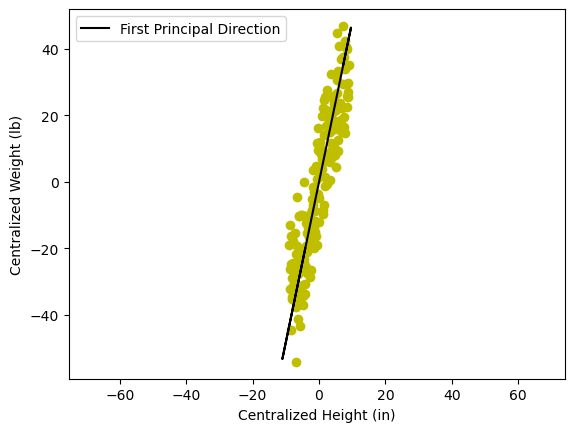

In [98]:
def plot_stretched_vector(v, **kwargs):
    plt.plot([-50 * v[0], 50 * v[0]], [-50 * v[1], 50 * v[1]], **kwargs)
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='First Principal Direction')
plt.scatter(centered_data[0], centered_data[1], c='y') 
plt.xlabel('Centralized Height (in)') 
plt.ylabel('Centralized Weight (lb)') 
plt.axis('equal')
plt.legend()
plt.show()


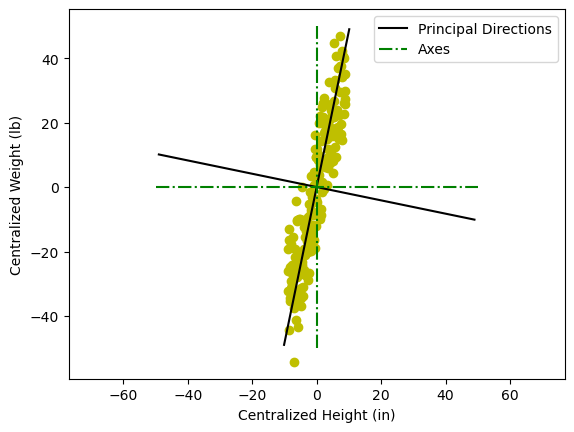

In [99]:
principal_components = pca_object.components_
for i, pc in enumerate(principal_components):
    plot_stretched_vector(pc, c='k', label='Principal Directions' if i == 0 else None)
for i, axis_vector in enumerate([np.array([0, 1]), np.array([1, 0])]): 
    plot_stretched_vector(axis_vector, c='g', linestyle='-.', label='Axes' if i == 0 else None)
plt.scatter(centered_data[0], centered_data[1], c='y') 
plt.xlabel('Centralized Height (in)') 
plt.ylabel('Centralized Weight (lb)') 
plt.axis('equal')
plt.legend()
plt.show()

In [100]:
projections = principal_components @ centered_data 
assert np.allclose(pca_transformed_data.T, projections)

In [102]:
from sklearn.datasets import load_iris
flower_data = load_iris()
flower_measurements = flower_data['data']
num_flowers, num_measurements = flower_measurements.shape 
print(f"{num_flowers} flowers have been measured.")
print(f"{num_measurements} measurements were recorded for every flower.") 
print("The first flower has the following measurements (in cm): "
      f"{flower_measurements[0]}")


150 flowers have been measured.
4 measurements were recorded for every flower.
The first flower has the following measurements (in cm): [5.1 3.5 1.4 0.2]


In [103]:
pca_object_2D = PCA(n_components=2)
transformed_data_2D = pca_object_2D.fit_transform(flower_measurements)

In [104]:
row_count, column_count = transformed_data_2D.shape
print(f"The matrix contains {row_count} rows, corresponding to "
f"{row_count} recorded flowers.")
print(f"It also contains {column_count} columns, corresponding to "
      f"{column_count} dimensions.")

The matrix contains 150 rows, corresponding to 150 recorded flowers.
It also contains 2 columns, corresponding to 2 dimensions.


In [105]:
def print_2D_variance_coverage(pca_object):
    percent_var_coverages = 100 * pca_object.explained_variance_ratio_
    x_axis_coverage, y_axis_coverage = percent_var_coverages 
    total_coverage = x_axis_coverage + y_axis_coverage 
    print(f"The x-axis covers {x_axis_coverage:.2f}% "
            "of the total variance")
    print(f"The y-axis covers {y_axis_coverage:.2f}% "
           "of the total variance")
    print(f"Together, the 2 axes cover {total_coverage:.2f}% "
           "of the total variance")
print_2D_variance_coverage(pca_object_2D)

The x-axis covers 92.46% of the total variance
The y-axis covers 5.31% of the total variance
Together, the 2 axes cover 97.77% of the total variance


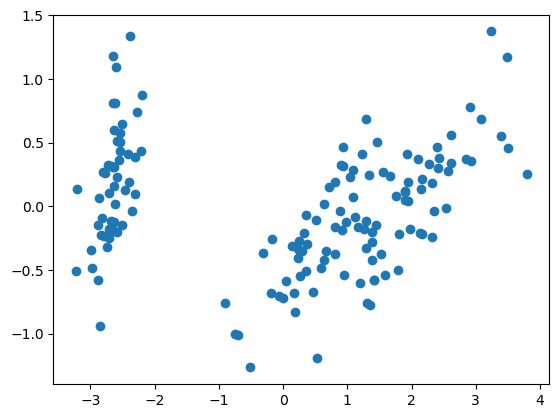

In [106]:
plt.scatter(transformed_data_2D[:,0], transformed_data_2D[:,1]) 
plt.show()

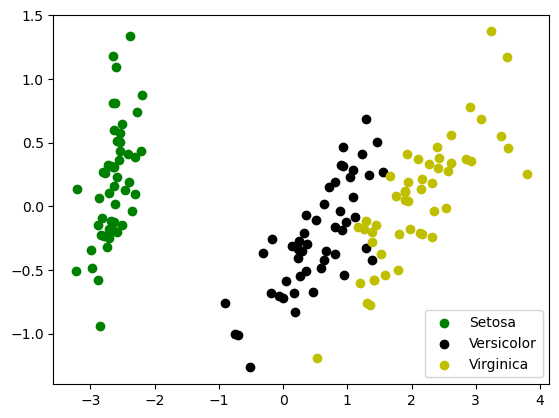

In [108]:
def visualize_flower_data(dim_reduced_data):
    species_names = flower_data['target_names']
    for i, species in enumerate(species_names):
        species_data = np.array([dim_reduced_data[j] for j in range(dim_reduced_data.shape[0]) if flower_data['target'][j] == i]).T
        plt.scatter(species_data[0], species_data[1], label = species.title(), color = ['g','k','y'][i])
    plt.legend()
    plt.show()
    
visualize_flower_data(transformed_data_2D)

In [109]:
def detect_setosa(flower_sample):
    centered_sample = flower_sample - pca_object_2D.mean_ 
    projection = pca_object_2D.components_[0] @ centered_sample 
    if projection < -2:
        print("The sample could be a Setosa")
    else:
        print("The sample is not a Setosa")
new_flower_sample = np.array([4.8, 3.7, 1.2, 0.24])
detect_setosa(new_flower_sample)

The sample could be a Setosa


In [110]:
first_axis_var = flower_measurements[:,0].var()
print(f"The variance of the first axis is: {first_axis_var:.2f}")
flower_measurements[:,0] *= 10
first_axis_var = flower_measurements[:,0].var()
print("We've converted the measurements from cm to mm.\nThat variance "
      f"now equals {first_axis_var:.2f}")

The variance of the first axis is: 0.68
We've converted the measurements from cm to mm.
That variance now equals 68.11


In [111]:
pca_object_2D.fit_transform(flower_measurements) 
print_2D_variance_coverage(pca_object_2D)

The x-axis covers 98.49% of the total variance
The y-axis covers 1.32% of the total variance
Together, the 2 axes cover 99.82% of the total variance


In [112]:
for i in range(flower_measurements.shape[1]): 
    flower_measurements[:,i] /= norm(flower_measurements[:,i])
transformed_data_2D = pca_object_2D.fit_transform(flower_measurements) 
print_2D_variance_coverage(pca_object_2D)

The x-axis covers 94.00% of the total variance
The y-axis covers 3.67% of the total variance
Together, the 2 axes cover 97.67% of the total variance


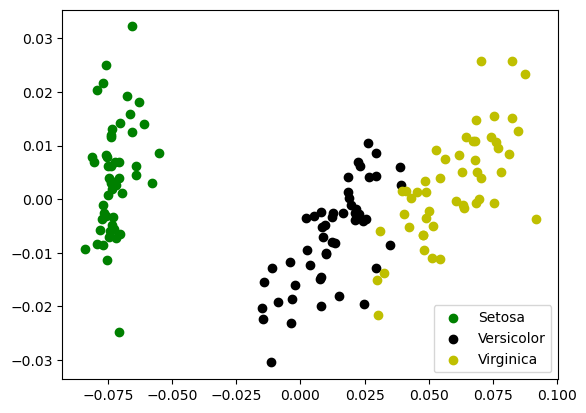

In [113]:
visualize_flower_data(transformed_data_2D)

In [114]:
data = np.array([1 + 1e-3, 1 - 1e-3])
mean = data.mean()
assert mean == 1
centralized_data = data - 2 * [mean]
assert centralized_data.mean() != 0
print(f"Actual mean is equal to {centralized_data.mean()}")

Actual mean is equal to -5.551115123125783e-17


### SVD Implemented

In [115]:
cov_matrix = centered_data @ centered_data.T / centered_data.shape[1] 
print(f"Covariance matrix:\n {cov_matrix}")
for i in range(centered_data.shape[0]):
    variance = cov_matrix[i][i]
    assert round(variance, 10) == round(centered_data[i].var(), 10)

Covariance matrix:
 [[ 26.99916667 106.30456732]
 [106.30456732 519.8206294 ]]


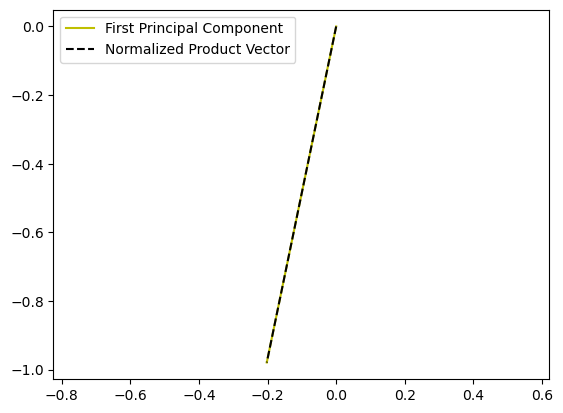

In [116]:
def plot_vector(vector, **kwargs):
    plt.plot([0, vector[0]], [0, vector[1]], **kwargs)
plot_vector(first_pc, c='y', label='First Principal Component') 
product_vector = cov_matrix @ first_pc
product_vector /= norm(product_vector) 
plot_vector(product_vector, c='k', linestyle='--',
            label='Normalized Product Vector')
plt.legend()
plt.axis('equal')
plt.show()

In [117]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)

In [118]:
cosine_similarity = product_vector @ product_vector2
angle = np.degrees(np.arccos(cosine_similarity))
print(f"The angle between vectors equals {angle:.2f} degrees")

The angle between vectors equals 0.00 degrees


In [119]:
new_magnitude = norm(cov_matrix @ first_pc)
print("Multiplication has stretched the first principal component by "
      f"approximately {new_magnitude:.1f} units.")


Multiplication has stretched the first principal component by approximately 541.8 units.


In [120]:
variance = (centered_data.T @ first_pc).var()
direction1_var = projections[0].var()
assert round(variance, 10) == round(direction1_var, 10)
print("The variance along the first principal direction is approximately"
f" {variance:.1f}")

The variance along the first principal direction is approximately 541.8


In [121]:
np.random.seed(0)
random_vector = np.random.random(size=2)
random_vector /= norm(random_vector)

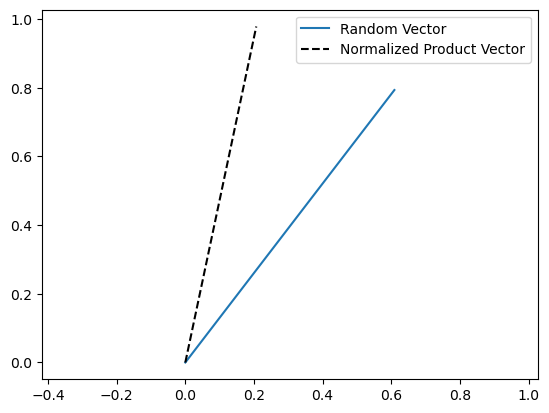

In [122]:
product_vector = cov_matrix @ random_vector
product_vector /= norm(product_vector)
plt.plot([0, random_vector[0]], [0, random_vector[1]], label='Random Vector')
plt.plot([0, product_vector[0]], [0, product_vector[1]], linestyle='--', c='k', label='Normalized Product Vector')
plt.legend()
plt.axis('equal')
plt.show()

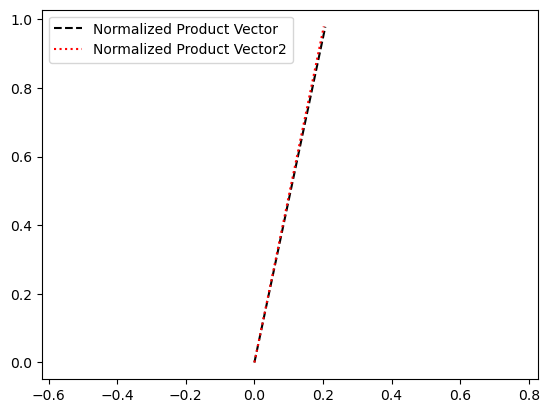

In [123]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)
plt.plot([0, product_vector[0]], [0, product_vector[1]], linestyle='--', c='k', label='Normalized Product Vector')
plt.plot([0, product_vector2[0]], [0, product_vector2[1]], linestyle=':', c='r', label='Normalized Product Vector2')
plt.legend()
plt.axis('equal')
plt.show()

In [126]:
np.random.seed(0)
def power_iteration(matrix):
    random_vector = np.random.random(size=matrix.shape[0]) 
    random_vector = random_vector / norm(random_vector) 
    old_rotated_vector = random_vector
    for _ in range(10):
        rotated_vector = matrix @ old_rotated_vector
        rotated_vector = rotated_vector / norm(rotated_vector)
        old_rotated_vector = rotated_vector
    eigenvector = rotated_vector
    eigenvalue = norm(matrix @ eigenvector)
    return eigenvector, eigenvalue
eigenvector, eigenvalue = power_iteration(cov_matrix) 
print(f"The extracted eigenvector is {eigenvector}") 
print(f"Its eigenvalue is approximately {eigenvalue: .1f}")


The extracted eigenvector is [0.20223994 0.979336  ]
Its eigenvalue is approximately  541.8


In [127]:
outer_product = np.outer(eigenvector, eigenvector)
for i in range(eigenvector.size):
    for j in range(eigenvector.size):
        assert outer_product[i][j] == eigenvector[i] * eigenvector[j]

In [128]:
deflated_matrix = cov_matrix - eigenvalue * outer_product

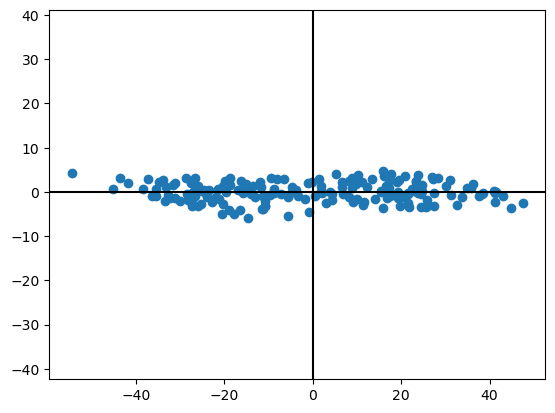

In [130]:
np.random.seed(0)
next_eigenvector, _ = power_iteration(deflated_matrix) 
components = np.array([eigenvector, next_eigenvector]) 
projections = components @ centered_data 
plt.scatter(projections[0], projections[1]) 
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

In [131]:
def find_top_principal_components(centered_matrix, k=2): 
    cov_matrix = centered_matrix @ centered_matrix.T 
    cov_matrix /= centered_matrix[1].size
    return find_top_eigenvectors(cov_matrix, k=k)
def find_top_eigenvectors(matrix, k=2):
    matrix = matrix.copy()
    eigenvectors = []
    for _ in range(k):
        eigenvector, eigenvalue = power_iteration(matrix) 
        eigenvectors.append(eigenvector)
        matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
    return np.array(eigenvectors)

In [132]:
def reduce_dimensions(data, k=2, centralize_data=True):
    data = data.T.copy()
    if centralize_data:
        for i in range(data.shape[0]):
            data[i] -= data[i].mean()
    principal_components = find_top_principal_components(data) 
    return (principal_components @ data).T


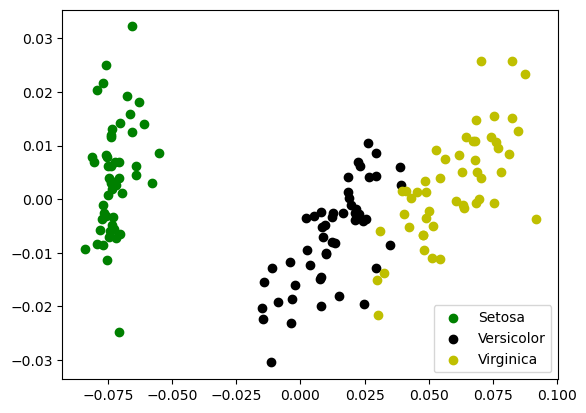

In [133]:
np.random.seed(0)
dim_reduced_data = reduce_dimensions(flower_measurements) 
visualize_flower_data(dim_reduced_data)

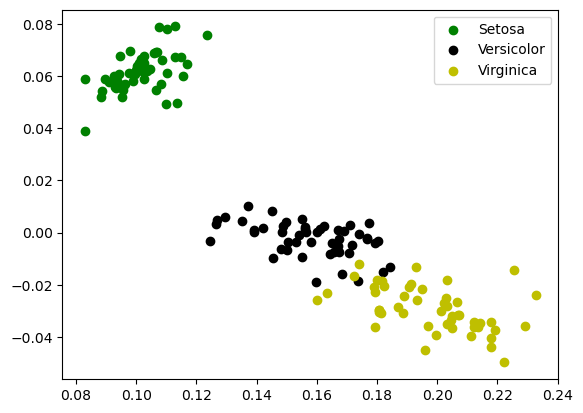

In [134]:
np.random.seed(3)
dim_reduced_data = reduce_dimensions(flower_measurements,
                                     centralize_data=False)
visualize_flower_data(dim_reduced_data)

In [135]:
variances = [sum(data[:,i].var() for i in range(data.shape[1])) for data in [dim_reduced_data, flower_measurements]]
dim_reduced_var, total_var = variances
percent_coverege = 100 * dim_reduced_var / total_var
print(f"Our plot covers {percent_coverege:.2f}% of the total variance")

Our plot covers 97.29% of the total variance


In [137]:
from sklearn.decomposition import TruncatedSVD

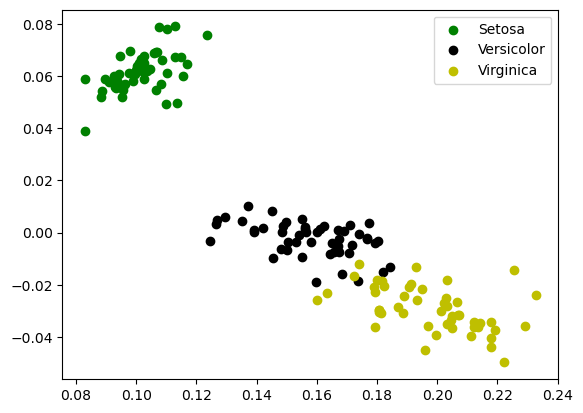

In [138]:
svd_object = TruncatedSVD(n_components=2)
svd_transformed_data = svd_object.fit_transform(flower_measurements) 
visualize_flower_data(svd_transformed_data)

In [139]:
percent_variance_coverages = 100 * svd_object.explained_variance_ratio_ 
x_axis_coverage, y_axis_coverage = percent_variance_coverages 
total_2d_coverage = x_axis_coverage + y_axis_coverage
print(f"Our Scikit-Learn SVD output covers {total_2d_coverage:.2f}% of "
               "the total variance")

Our Scikit-Learn SVD output covers 97.29% of the total variance


## NLP analysis of large text datasets

In [146]:
from sklearn.datasets import fetch_20newsgroups

In [147]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers'))

In [148]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [149]:
print(newsgroups.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [150]:
origin = newsgroups.target_names[newsgroups.target[0]]
print(f"The post at index 0 first appeared in the '{origin}' group")

The post at index 0 first appeared in the 'rec.autos' group


In [151]:
dataset_size = len(newsgroups.data)
print(f"Our dataset contains {dataset_size} newsgroup posts")

Our dataset contains 11314 newsgroup posts


In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [154]:
tf_matrix = vectorizer.fit_transform(newsgroups.data) 
print(tf_matrix)

  (0, 108644)	4
  (0, 110106)	1
  (0, 57577)	2
  (0, 24398)	2
  (0, 79534)	1
  (0, 100942)	1
  (0, 37154)	1
  (0, 45141)	1
  (0, 70570)	1
  (0, 78701)	2
  (0, 101084)	4
  (0, 32499)	4
  (0, 92157)	1
  (0, 100827)	6
  (0, 79461)	1
  (0, 39275)	1
  (0, 60326)	2
  (0, 42332)	1
  (0, 96432)	1
  (0, 67137)	1
  (0, 101732)	1
  (0, 27703)	1
  (0, 49871)	2
  (0, 65338)	1
  (0, 14106)	1
  :	:
  (11313, 55901)	1
  (11313, 93448)	1
  (11313, 97535)	1
  (11313, 93393)	1
  (11313, 109366)	1
  (11313, 102215)	1
  (11313, 29148)	1
  (11313, 26901)	1
  (11313, 94401)	1
  (11313, 89686)	1
  (11313, 80827)	1
  (11313, 72219)	1
  (11313, 32984)	1
  (11313, 82912)	1
  (11313, 99934)	1
  (11313, 96505)	1
  (11313, 72102)	1
  (11313, 32981)	1
  (11313, 82692)	1
  (11313, 101854)	1
  (11313, 66399)	1
  (11313, 63405)	1
  (11313, 61366)	1
  (11313, 7462)	1
  (11313, 109600)	1


In [155]:
print(type(tf_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


In [156]:
tf_np_matrix = tf_matrix.toarray()
print(tf_np_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [157]:
assert tf_np_matrix.shape == tf_matrix.shape
num_posts, vocabulary_size = tf_np_matrix.shape
print(f"Our collection of {num_posts} newsgroup posts contain a total of "
      f"{vocabulary_size} unique words")

Our collection of 11314 newsgroup posts contain a total of 114751 unique words


In [158]:
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
num_unique_words = non_zero_indices.size
print(f"The newsgroup in row 0 contains {num_unique_words} unique words.") 
print("The actual word counts map to the following column indices:\n") 
print(non_zero_indices)

The newsgroup in row 0 contains 64 unique words.
The actual word counts map to the following column indices:

[ 14106  15549  22088  23323  24398  27703  29357  30093  30629  32194
  32305  32499  37154  39275  42332  42333  43643  45089  45141  49871
  49881  50165  54442  55453  57577  58321  58842  60116  60326  64083
  65338  67137  67140  68931  69080  70570  72915  75280  78264  78701
  79055  79461  79534  82759  84398  87690  89161  92157  93304  95225
  96145  96432 100406 100827 100942 101084 101732 108644 109086 109254
 109294 110106 112936 113262]


In [159]:
words = vectorizer.get_feature_names()
unique_words = [words[i] for i in non_zero_indices]
print(unique_words)

['60s', '70s', 'addition', 'all', 'anyone', 'be', 'body', 'bricklin', 'bumper', 'called', 'can', 'car', 'could', 'day', 'door', 'doors', 'early', 'engine', 'enlighten', 'from', 'front', 'funky', 'have', 'history', 'if', 'in', 'info', 'is', 'it', 'know', 'late', 'looked', 'looking', 'made', 'mail', 'me', 'model', 'name', 'of', 'on', 'or', 'other', 'out', 'please', 'production', 'really', 'rest', 'saw', 'separate', 'small', 'specs', 'sports', 'tellme', 'the', 'there', 'this', 'to', 'was', 'were', 'whatever', 'where', 'wondering', 'years', 'you']


/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [160]:
data = {'Word': unique_words,
               'Count': tf_vector[non_zero_indices]}
df = pd.DataFrame(data).sort_values('Count', ascending=False) 
print(df[:10].to_string(index=False))

  Word  Count
   the      6
  this      4
   was      4
   car      4
    if      2
    is      2
    it      2
  from      2
    on      2
anyone      2


In [161]:
vectorizer = CountVectorizer(stop_words='english') 
tf_matrix = vectorizer.fit_transform(newsgroups.data) 
assert tf_matrix.shape[1] < 114751
words = vectorizer.get_feature_names()
for common_word in ['the', 'this', 'was', 'if', 'it', 'on']:
    assert common_word not in words

/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [164]:
tf_np_matrix = tf_matrix.toarray()
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
unique_words = [words[index] for index in non_zero_indices] 
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices]}
df = pd.DataFrame(data).sort_values('Count', ascending=False) 
print(f"After stop-word deletion, {df.shape[0]} unique words remain.") 
print("The 10 most frequent words are:\n") 
print(df[:10].to_string(index=False))


After stop-word deletion, 34 unique words remain.
The 10 most frequent words are:

      Word  Count
       car      4
       60s      1
       saw      1
   looking      1
      mail      1
     model      1
production      1
    really      1
      rest      1
  separate      1


In [165]:
sub_matrix = tf_np_matrix[:,non_zero_indices]
print("Our sub-matrix corresponds to the 34 words within post 0. "
"The first row of the sub-matrix is:")
print(sub_matrix[0])

Our sub-matrix corresponds to the 34 words within post 0. The first row of the sub-matrix is:
[1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [167]:
from sklearn.preprocessing import binarize

In [168]:
from sklearn.preprocessing import binarize
binary_matrix = binarize(sub_matrix)
print(binary_matrix)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [169]:
unique_post_mentions = binary_matrix.sum(axis=0)
print("This vector counts the unique posts in which each word is "
      f"mentioned:\n {unique_post_mentions}")

This vector counts the unique posts in which each word is mentioned:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]


In [170]:
np_post_mentions = binarize(tf_np_matrix[:,non_zero_indices]).sum(axis=0) 
csr_post_mentions = binarize(tf_matrix[:,non_zero_indices]).sum(axis=0) 
print(f'NumPy matrix-generated counts:\n {np_post_mentions}\n') 
print(f'CSR matrix-generated counts:\n {csr_post_mentions}')


NumPy matrix-generated counts:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]

CSR matrix-generated counts:
 [[  18   21  202  314    4   26  802  536  842  154   67  348  184   25
     7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
   574   95   98    2  295 1174]]


In [172]:
document_frequencies = unique_post_mentions / dataset_size 
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices],
        'Document Frequency': document_frequencies}
df = pd.DataFrame(data)
df_common_words = df[df['Document Frequency'] >= .1]
print(df_common_words.to_string(index=False))

  Word  Count  Document Frequency
  know      1            0.273378
really      1            0.131960
 years      1            0.103765


In [173]:
df_sorted = df.sort_values(['Count', 'Document Frequency'], ascending=[False, True])
print(df_sorted[:10].to_string(index=False))


      Word  Count  Document Frequency
       car      4            0.047375
    tellme      1            0.000177
  bricklin      1            0.000354
     funky      1            0.000619
       60s      1            0.001591
       70s      1            0.001856
 enlighten      1            0.002210
    bumper      1            0.002298
     doors      1            0.005922
production      1            0.008397


In [174]:
inverse_document_frequencies = 1 / document_frequencies 
df['IDF'] = inverse_document_frequencies
df['Combined'] = df.Count * inverse_document_frequencies 
df_sorted = df.sort_values('Combined', ascending=False) 
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency         IDF    Combined
    tellme      1            0.000177 5657.000000 5657.000000
  bricklin      1            0.000354 2828.500000 2828.500000
     funky      1            0.000619 1616.285714 1616.285714
       60s      1            0.001591  628.555556  628.555556
       70s      1            0.001856  538.761905  538.761905
 enlighten      1            0.002210  452.560000  452.560000
    bumper      1            0.002298  435.153846  435.153846
     doors      1            0.005922  168.865672  168.865672
     specs      1            0.008397  119.094737  119.094737
production      1            0.008397  119.094737  119.094737


In [175]:
assert np.log10(1000000) == 6

In [176]:
df['Combined'] = df.Count * np.log10(df.IDF)
df_sorted = df.sort_values('Combined', ascending=False) 
print(df_sorted[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined
      car      4            0.047375   21.108209  5.297806
   tellme      1            0.000177 5657.000000  3.752586
 bricklin      1            0.000354 2828.500000  3.451556
    funky      1            0.000619 1616.285714  3.208518
      60s      1            0.001591  628.555556  2.798344
      70s      1            0.001856  538.761905  2.731397
enlighten      1            0.002210  452.560000  2.655676
   bumper      1            0.002298  435.153846  2.638643
    doors      1            0.005922  168.865672  2.227541
    specs      1            0.008397  119.094737  2.075893


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english') 
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data) 
assert tfidf_matrix.shape == tf_matrix.shape

In [180]:
assert tfidf_vectorizer.get_feature_names() == words

/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [181]:
tfidf_np_matrix = tfidf_matrix.toarray()
tfidf_vector = tfidf_np_matrix[0] 
tfidf_non_zero_indices = np.flatnonzero(tfidf_vector) 
assert np.array_equal(tfidf_non_zero_indices,
                      non_zero_indices)

In [182]:
df['TFIDF'] = tfidf_vector[non_zero_indices]

In [183]:
df_sorted_old = df.sort_values('Combined', ascending=False) 
df_sorted_new = df.sort_values('TFIDF', ascending=False) 
assert np.array_equal(df_sorted_old['Word'].values,
df_sorted_new['Word'].values) 
print(df_sorted_new[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined    TFIDF
      car      4            0.047375   21.108209  5.297806 0.459552
   tellme      1            0.000177 5657.000000  3.752586 0.262118
 bricklin      1            0.000354 2828.500000  3.451556 0.247619
    funky      1            0.000619 1616.285714  3.208518 0.234280
      60s      1            0.001591  628.555556  2.798344 0.209729
      70s      1            0.001856  538.761905  2.731397 0.205568
enlighten      1            0.002210  452.560000  2.655676 0.200827
   bumper      1            0.002298  435.153846  2.638643 0.199756
    doors      1            0.005922  168.865672  2.227541 0.173540
    specs      1            0.008397  119.094737  2.075893 0.163752


In [185]:
# from numpy.linalg import norm
assert norm(df.TFIDF.values) == 1

In [186]:
cosine_similarities = tfidf_np_matrix @ tfidf_np_matrix[0] 
print(cosine_similarities)

[1.         0.00834093 0.04448717 ... 0.         0.00270615 0.01968562]


In [187]:
most_similar_index = np.argsort(cosine_similarities)[-2]
similarity = cosine_similarities[most_similar_index]
most_similar_post = newsgroups.data[most_similar_index]
print(f"The following post has a cosine similarity of {similarity:.2f} "
       "with newsgroups.data[0]:\n")
print(most_similar_post)

The following post has a cosine similarity of 0.64 with newsgroups.data[0]:

In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.

Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.

>    ---- brought to you by your neig

In [189]:
np.random.seed(0)
from sklearn.decomposition import TruncatedSVD
shrunk_matrix = TruncatedSVD(n_components=100).fit_transform(tfidf_matrix) 
print(f"We've dimensionally reduced a {tfidf_matrix.shape[1]}-column "
      f"{type(tfidf_matrix)} matrix.")
print(f"Our output is a {shrunk_matrix.shape[1]}-column "
      f"{type(shrunk_matrix)} matrix.")

We've dimensionally reduced a 114441-column <class 'scipy.sparse._csr.csr_matrix'> matrix.
Our output is a 100-column <class 'numpy.ndarray'> matrix.


In [190]:
magnitude = norm(shrunk_matrix[0])
print(f"The magnitude of the first row is {magnitude:.2f}")

The magnitude of the first row is 0.49


In [191]:
from sklearn.preprocessing import normalize

In [193]:
shrunk_norm_matrix = normalize(shrunk_matrix)
magnitude = norm(shrunk_norm_matrix[0])
print(f"The magnitude of the first row is {magnitude:.2f}")

The magnitude of the first row is 1.00


In [194]:
cosine_similarity_matrix = shrunk_norm_matrix @ shrunk_norm_matrix.T

In [195]:
np.random.seed(1)
index1 = np.random.randint(dataset_size)

In [197]:
index2 = np.argsort(cosine_similarity_matrix[index1])[-2] 
similarity = cosine_similarity_matrix[index1][index2]
print(f"The posts at indices {index1} and {index2} share a cosine "
      f"similarity of {similarity:.2f}")

The posts at indices 235 and 7805 share a cosine similarity of 0.91


In [198]:
print(newsgroups.data[index2].replace('\n\n', '\n'))

Hello,
	Who can tell me   Where can I find the PD or ShareWare   
Which can CAPTURE windows 3.1's output of printer mananger?
	I want to capture the output of HP Laser Jet III.
	Though the PostScript can setup to print to file,but HP can't.
	I try DOS's redirect program,but they can't work in Windows 3.1
		Thankx for any help....
--
 Internet Address: u7911093@cc.nctu.edu.tw
    English Name: Erik Wang
    Chinese Name: Wang Jyh-Shyang


In [199]:
print(newsgroups.data[index1].replace('\n\n', '\n'))

u7911093@cc.nctu.edu.tw ("By SWH ) writes:
>Who can tell me which program (PD or ShareWare) can redirect windows 3.1's
>output of printer manager to file? 
>	I want to capture HP Laser Jet III's print output.
> 	Though PostScript can setup print to file,but HP can't.
>	I use DOS's redirect program,but they can't work in windows.
>		Thankx for any help...
>--
> Internet Address: u7911093@cc.nctu.edu.tw
>    English Name: Erik Wang
>    Chinese Name: Wang Jyh-Shyang
> National Chiao-Tung University,Taiwan,R.O.C.
Try setting up another HPIII printer but when choosing what port to connect it
to choose FILE instead of like :LPT1.  This will prompt you for a file name
everytime you print with that "HPIII on FILE" printer. Good Luck.



In [201]:
cluster_model = DBSCAN(eps=0.4, min_samples=50, metric='cosine') 
clusters = cluster_model.fit_predict(shrunk_matrix)

In [202]:
cluster_count = clusters.max() + 1
print(f"We've generated {cluster_count} DBSCAN clusters")

We've generated 3 DBSCAN clusters


In [204]:
np.random.seed(0)
import time
k=20
times = []
for KMeans_class in [KMeans, MiniBatchKMeans]:
    start_time = time.time()
    KMeans_class(k).fit(shrunk_norm_matrix)
    times.append(time.time() - start_time)
running_time_ratio = times[0] / times[1]
print(f"Mini Batch K-means ran {running_time_ratio:.2f} times faster "
       "than regular K-means")

Mini Batch K-means ran 14.11 times faster than regular K-means


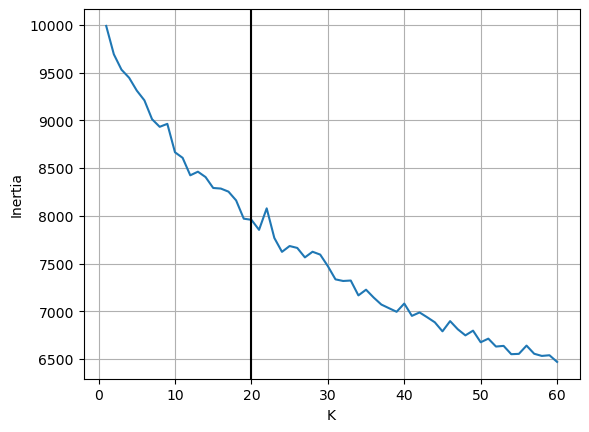

In [205]:
np.random.seed(0)
k_values = range(1, 61)
inertia_values = [MiniBatchKMeans(k).fit(shrunk_norm_matrix).inertia_
                  for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.axvline(20, c='k')
plt.grid(True)
plt.show()

In [206]:
np.random.seed(0)
cluster_model = KMeans(n_clusters=20)
clusters = cluster_model.fit_predict(shrunk_norm_matrix)
df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters})

In [207]:
df_car = df[df.Cluster == clusters[0]]
cluster_size = df_car.shape[0]
print(f"{cluster_size} posts cluster together with the car-themed post "
       "at index 0")

409 posts cluster together with the car-themed post at index 0


In [208]:
np.random.seed(1)
def get_post_category(index):
    target_index = newsgroups.target[index]
    return newsgroups.target_names[target_index]
random_index = np.random.choice(df_car.Index.values) 
post_category = get_post_category(random_index)
print(f"This post appeared in the {post_category} discussion group:\n") 
print(newsgroups.data[random_index].replace('\n\n', '\n'))

This post appeared in the rec.autos discussion group:

In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.
Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.
>    ---- brought to you by your neighborhood Lerxst ----
Rus

In [209]:
rec_autos_count = 0
for index in df_car.Index.values:
    if get_post_category(index) == 'rec.autos':
        rec_autos_count += 1
rec_autos_percent = 100 * rec_autos_count / cluster_size 
print(f"{rec_autos_percent:.2f}% of posts within the cluster appeared "
       "in the rec.autos discussion group")

83.62% of posts within the cluster appeared in the rec.autos discussion group


In [210]:
np.random.seed(1)
not_autos_indices = [index for index in df_car.Index.values if get_post_category(index) != 'rec.autos']
random_index = np.random.choice(not_autos_indices)
post_category = get_post_category(random_index)
print(f"This post appeared in the {post_category} discussion group:\n") 
print(newsgroups.data[random_index].replace('\n\n', '\n'))


This post appeared in the misc.forsale discussion group:

1976 BMW 530i
The original four door sports sedan

Arctic Blue metallic with gold alloy plus-1 wheels (Rial 15")
Goodyear Eagle GT+4 racing tires (mud/snow-rated)
3.0 liter, 186 HP, fuel injected engine w/Stahl headers
adjustable gas shocks all around (Koni,BYK)
4 speed stick, 4 wheel power disc brakes, sunroof, PS, AC
Listen-Up installed hidden speaker stereo w/subwoofer
208K miles (yet much better condition than most cars w/100K)
Meticulously maintained: all records, 3K mi oil changes
Faded paint on top, otherwise excellent exterior and interior.
The car has required no major repair work in the more than ten years I have
owned it. It has never failed to start or broken down, even in the coldest
weather. This has been an extraordinarily reliable and economical car, and
shows every sign of staying that way. Yet it is an absolute thrill to drive
when you take it to secluded twisty mountain road! I sell it now,
reluctantly, since 

In [212]:
def rank_words_by_tfidf(indices, word_list=words):
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] 
    data = {'Word': word_list, 'Summed TFIDF': summed_tfidf}
    return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
df_ranked_words = rank_words_by_tfidf(not_autos_indices) 
print(df_ranked_words[:10].to_string(index=False))

    Word  Summed TFIDF
     car      8.311434
   radar      2.439239
   radio      2.004262
    cars      1.856726
   speed      1.716273
     ham      1.681461
detector      1.370761
   miles      1.369876
    just      1.289348
     com      1.182443


In [213]:
# import nltk

In [214]:
df_ranked_words = rank_words_by_tfidf(df_car.Index.values) 
print(df_ranked_words[:10].to_string(index=False))

   Word  Summed TFIDF
    car     48.311334
   cars     17.891155
 engine     11.482422
 dealer      8.501634
    com      7.921964
   just      7.466364
 writes      7.347268
    edu      7.259972
   good      6.937673
article      6.893581


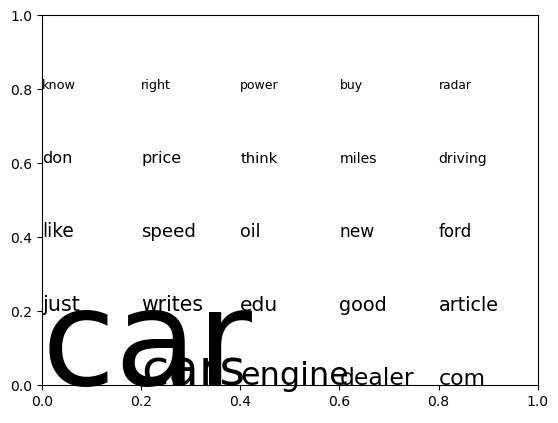

In [215]:
i=0
for x_coord in np.arange(0, 1, .2):
    for y_coord in np.arange(0, 1, .2):
        word, significance = df_ranked_words.iloc[i].values 
        plt.text(y_coord, x_coord, word, fontsize=2*significance) 
        i += 1
plt.show()

In [216]:
from wordcloud import WordCloud
cloud_generator = WordCloud(random_state=1)

In [217]:
words_to_score = {word: score
                          for word, score in df_ranked_words[:10].values}
wordcloud_image = cloud_generator.fit_words(words_to_score)


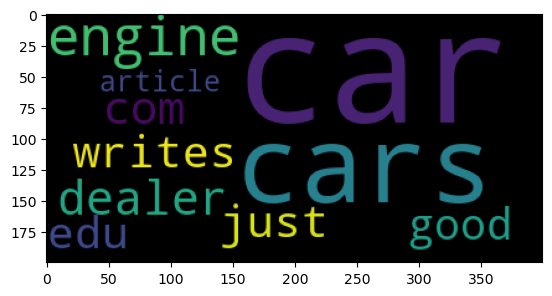

In [218]:
plt.imshow(wordcloud_image)
plt.show()

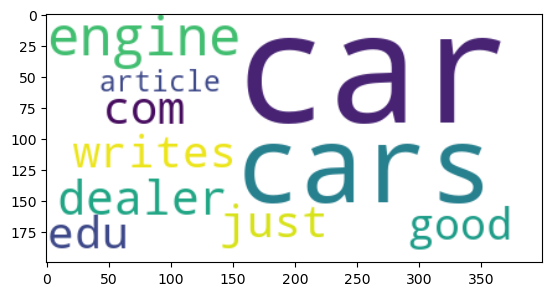

In [219]:
cloud_generator = WordCloud(background_color='white', random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score) 
plt.imshow(wordcloud_image, interpolation="bilinear") 
plt.show()

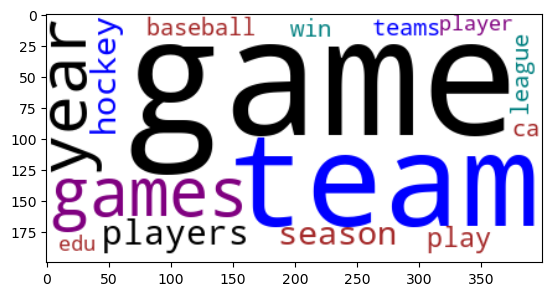

In [220]:
np.random.seed(1)
def cluster_to_image(df_cluster, max_words=15):
    indices = df_cluster.Index.values
    df_ranked_words = rank_words_by_tfidf(indices)[:max_words] 
    words_to_score = {word: score for word, score in df_ranked_words[:max_words].values} 
    cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image
def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])
cluster_id = np.random.randint(0, 20) 
df_random_cluster = df[df.Cluster == cluster_id] 
wordcloud_image = cluster_to_image(df_random_cluster) 
plt.imshow(wordcloud_image, interpolation="bilinear") 
plt.show()

In [221]:
from collections import Counter
def get_top_category(df_cluster):
    categories = [get_post_category(index)
                  for index in df_cluster.Index.values]
    top_category, _ = Counter(categories).most_common()[0]
    return top_category
top_category = get_top_category(df_random_cluster)
print("The posts within the cluster commonly appear in the "
      f"'{top_category}' newsgroup")

The posts within the cluster commonly appear in the 'rec.sport.hockey' newsgroup


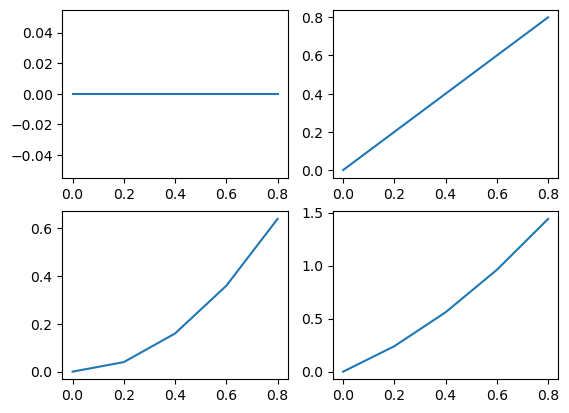

In [222]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        x = np.arange(0, 1, .2) 
        y=r*x*x+c*x 
        axes[r][c].plot(x, y)
plt.show()

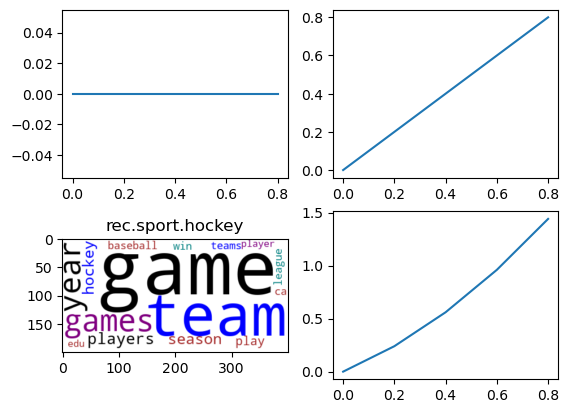

In [224]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        if (r, c) == (1, 0):
            axes[r][c].set_title(top_category)
            axes[r][c].imshow(wordcloud_image,
                              interpolation="bilinear")
        else:
            x = np.arange(0, 1, .2) 
            y=r*x*x+c*x
            axes[r][c].plot(x, y)
plt.show()

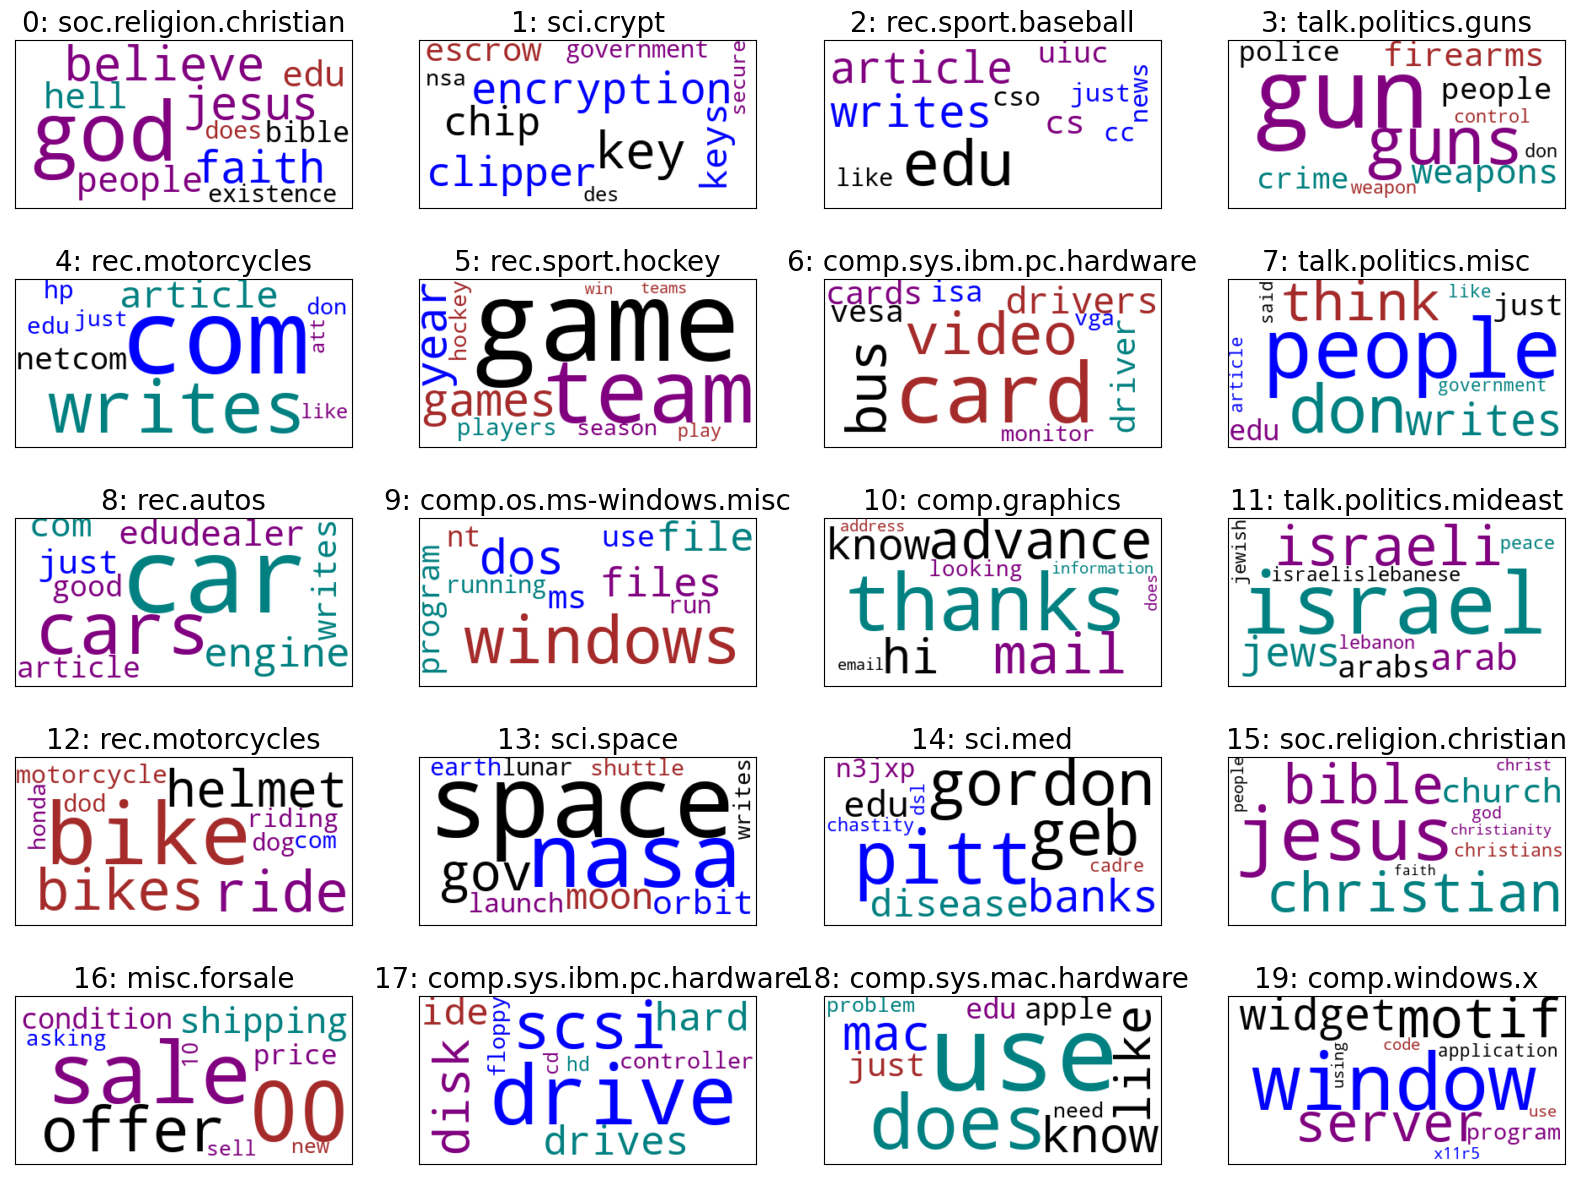

In [225]:
np.random.seed(0)
def get_title(df_cluster):
    top_category = get_top_category(df_cluster)
    cluster_id = df_cluster.Cluster.values[0]
    return f"{cluster_id}: {top_category}"
figure, axes = plt.subplots(5, 4, figsize=(20, 15)) 
cluster_groups = list(df.groupby('Cluster'))
for r in range(5):
    for c in range(4):
        _, df_cluster = cluster_groups.pop(0)
        wordcloud_image = cluster_to_image(df_cluster, max_words=10) 
        ax = axes[r][c]
        ax.imshow(wordcloud_image,
        interpolation="bilinear") 
        ax.set_title(get_title(df_cluster), fontsize=20) 
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()

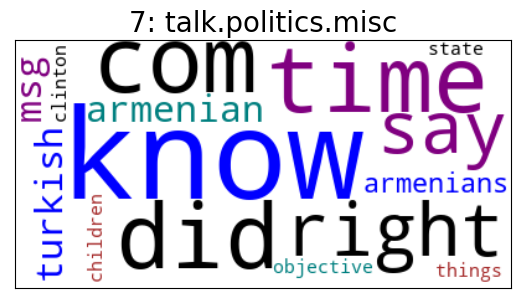

In [227]:
np.random.seed(3)
df_cluster= df[df.Cluster == 7]
df_ranked_words = rank_words_by_tfidf(df_cluster.Index.values)
words_to_score = {word: score
                  for word, score in df_ranked_words[10:25].values}
cloud_generator = WordCloud(background_color='white', color_func=_color_func,
random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear") 
plt.title(get_title(df_cluster), fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

### HTML document structure

In [228]:
html_contents = "<html>Hello</html>"

In [231]:
from IPython.core.display import display, HTML

/var/folders/y0/ybd_19zx7ysgpxrsrdkzf22m0000gn/T/ipykernel_2986/2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [233]:
def render(html_contents): display(HTML(html_contents)) 
render(html_contents)

In [234]:
title = "<title>Data Science is Fun</title>"

In [235]:
html_contents = f"<html>{title}Hello</html>"
render(html_contents)

In [236]:
head = f"<head>{title}</head>"
body = "<body>Hello</body>"
html_contents = f"<html> {title} {body}</html>"

In [237]:
header = "<h1>Data Science is Fun</h1>"
body = f"<body>{header}Hello</body>"
html_contents = f"<html> {title} {body}</html>"
render(html_contents)

In [238]:
paragraphs = ''
for i in range(2):
    paragraph_string = f"Paragraph {i} " * 40
    paragraphs += f"<p>{paragraph_string}</p>"
body = f"<body>{header}{paragraphs}</body>"
html_contents = f"<html> {title} {body}</html>"
render(html_contents)

In [239]:
paragraphs = ''
for i in range(2):
    paragraph_string = f"Paragraph {i} " * 40
    attribute = f"id='paragraph {i}'"
    paragraphs += f"<p {attribute}>{paragraph_string}</p>"
body = f"<body>{header}{paragraphs}</body>"
html_contents = f"<html> {title} {body}</html>"


In [267]:
link_text = "Data Science Bookcamp"
url = "https://www.manning.com/books/data-science-bookcamp"
hyperlink = f"<a href='{url}'>{link_text}</a>"
new_paragraph = f"<p id='paragraph 2'>Here is a link to {hyperlink}</p>" 
paragraphs += new_paragraph
body = f"<body>{header}{paragraphs}</body>"
html_contents = f"<html> {title} {body}</html>"
render(html_contents)

In [268]:
libraries = ['NumPy', 'SciPy', 'Pandas', 'Scikit-Learn']

In [269]:
items = ''
for library in libraries:
    items += f"<li>{library}</li>"


In [270]:
unstructured_list = f"<ul>{items}</ul>"
header2 = '<h2>Common Data Science Libraries</h2>'
body = f"<body>{header}{paragraphs}{header2}{unstructured_list}</body>" 
html_contents = f"<html> {title} {body}</html>"
render(html_contents)

In [271]:
div1 = f"<div id='paragraphs' class='text'>{paragraphs}</div>"
div2 = f"<div id='list' class='text'>{header2}{unstructured_list}</div>"
div3 = "<div id='empty' class='empty'></div>"
body = f"<body>{header}{div1}{div2}{div3}</body>"
html_contents = f"<html> {title}{body}</html>"

In [272]:
print(html_contents)

<html> <title>Data Science is Fun</title><body><h1>Data Science is Fun</h1><div id='paragraphs' class='text'>[<p id="paragraph 0">Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 </p>, <p id="paragraph 1">Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Para

In [247]:
split_contents = html_contents.split('>')
for i, substring in enumerate(split_contents):
    if substring.endswith('<title'):
        next_string = split_contents[i + 1]
        title = next_string.split('<')[0]
        print(title)
        break

Data Science is Fun


In [248]:
from bs4 import BeautifulSoup as bs

In [249]:
soup = bs(html_contents)

In [250]:
print(soup.prettify())

<html>
 <head>
  <title>
   Data Science is Fun
  </title>
 </head>
 <body>
  <h1>
   Data Science is Fun
  </h1>
  <div class="text" id="paragraphs">
   <p id="paragraph 0">
    Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0
   </p>
   <p id="paragraph 1">
    Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Parag

In [251]:
title = soup.find('title')
print(title)

<title>Data Science is Fun</title>


In [252]:
print(type(title))

<class 'bs4.element.Tag'>


In [253]:
print(title.text)

Data Science is Fun


In [254]:
assert soup.title.text == title.text

In [255]:
body = soup.body
print(body.text)

Data Science is FunParagraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Here is a link to Dat

In [256]:
assert body.p.text == soup.p.text
print(soup.p.text)

Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 


In [257]:
paragraphs = body.find_all('p')
for i, paragraph in enumerate(paragraphs):
    print(f"\nPARAGRAPH {i}:")
    print(paragraph.text)


PARAGRAPH 0:
Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 

PARAGRAPH 1:
Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 

PARAGRAPH

In [258]:
print([bullet.text for bullet in  body.find_all('li')])

['NumPy', 'SciPy', 'Pandas', 'Scikit-Learn']


In [259]:
paragraph_2 = soup.find(id='paragraph 2')
print(paragraph_2.text)


Here is a link to Data Science Bookcamp


In [260]:
assert paragraph_2.get('id') == 'paragraph 2'
print(paragraph_2.a.get('href'))

https://www.manning.com/books/data-science-bookcamp


In [265]:
for division in soup.find_all('div', class_='text'): 
    id_ = division.get('id')
    print(f"\nDivision with id '{id_}':")
    print(division.text)


Division with id 'paragraphs':
Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 0 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Paragraph 1 Here is 

In [266]:
body.find(id='paragraph 0').decompose()
soup.find(id='paragraph 1').decompose()
print(body.find(id='paragraphs').text)

TypeError: find() takes no keyword arguments

In [273]:
new_paragraph = soup.new_tag('p')
print(new_paragraph)

<p></p>


In [274]:
new_paragraph.string = "This paragraph is new"
print(new_paragraph)


<p>This paragraph is new</p>


In [275]:
soup.find(id='empty').append(new_paragraph)
render(soup.prettify())

In [276]:
from urllib.request import urlopen

In [277]:
url = "https://www.manning.com/books/data-science-bookcamp" 
html_contents = urlopen(url).read()
print(html_contents[:1000])

b'\n<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html lang="en" class="no-js ie6 ie"> <![endif]-->\n<!--[if IE 7 ]>    <html lang="en" class="no-js ie7 ie"> <![endif]-->\n<!--[if IE 8 ]>    <html lang="en" class="no-js ie8 ie"> <![endif]-->\n<!--[if IE 9 ]>    <html lang="en" class="no-js ie9 ie"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html lang="en" class="no-js"><!--<![endif]-->\n\n<head>\n    <meta name="theme-color" content="#333333">\n    <title>Data Science Bookcamp</title>\n\n\n\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">\n<meta name="application-name" content="Data Science Bookcamp"/>\n<meta name="apple-mobile-web-app-title" content="Data Science Bookcamp"/>\n\n<meta property="og:title" content="Data Science Bookcamp"/>\n<meta name="twitter:title" content="Data Science Bookcamp"/>\n\n<meta name="tw

In [278]:
soup = bs(html_contents)
print(soup.title.text)

Data Science Bookcamp


In [279]:
for division in soup.find_all('div'):
    header = division.h2
    if header is None:
        continue
        
    if header.text.lower() == 'about the book':
        print(division.text)


about the book

Data Science Bookcamp doesn’t stop with surface-level theory and toy examples. As you work through each project, you’ll learn how to troubleshoot common problems like missing data, messy data, and algorithms that don’t quite fit the model you’re building. You’ll appreciate the detailed setup instructions and the fully explained solutions that highlight common failure points. In the end, you’ll be confident in your skills because you can see the results.
    
